<a href="https://colab.research.google.com/github/paulc00/ML-Intro/blob/master/notebooks/1_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with scikit-learn

This notebook demonstrates a very simple example of a linear regression in scikit learn.

There are four main steps in this modelling process:
1. Import and prepare the data
2. Build and train the model against the training data
3. Evaluate the trained model
4. Ouput some results

In [0]:
# Original code source: Jaques Grobler
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Comments added and some additional code (PC)

First, we have some housekeeping. We need to import any Python packages we will 
be using.

The `%matplotlib inline` statement is a directive to Jupyter to tell it to show graphics within the notebook instead of trying to open a window.

In [0]:
## 0. Import necessary packages

# Matplotlib to display graphical information
import matplotlib.pyplot as plt
%matplotlib inline

# numpy for linear algebra
import numpy as np
# We're only use it very minimally in the data prep section here in this case

# scikit-learn to perform machine learning
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Unlike the earlier imports we're just importing the functions we need
# from scikit-learn. This will save on memory.


## 1. Import and prepare the data

At this point we can read in our data and make any adjustments required.

We would normally do some exploratory data analysis (EDA) here to determine how best to modify the data for optimal traininng and what model(s) might work best with it. In this case we just choose provided target (*disease progression*) and the first feature (*age*).

It's worth noting that the documentation for this dataset states that 'Each of the feature variables have been mean centered and scaled by the standard deviation times n_samples', that is to say they have been standardized to have mean 0 and squared length = 1, so some prepapration has already taken place on this data.

We don't have access to the original mean and standard deviation so we cannot un-standarize these features to see the real value, for age for instance.


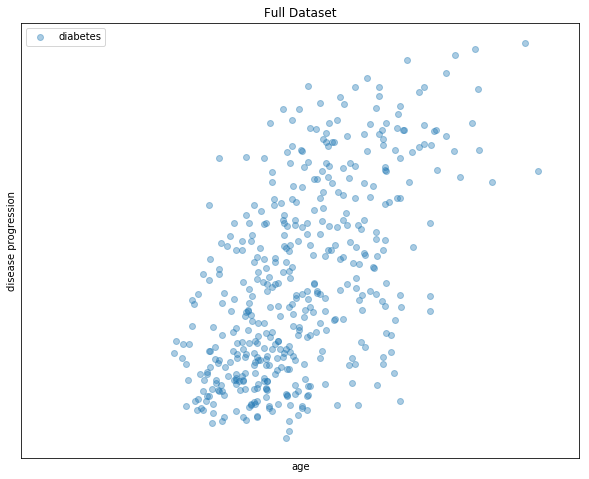

In [0]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

## We're skipping exploratory data anlysis that would usually come here

# Use only one feature (standardized age)
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Plot the full dataset (disease progression vs age)
plt.figure(figsize=(10,8))
plt.title('Full Dataset')
plt.scatter(diabetes_X, diabetes.target, c='#1f77b4', alpha = 0.375, label='diabetes')
plt.xlabel('age')
plt.ylabel('disease progression')
plt.xlim((-0.2, 0.2))
plt.xticks(())
plt.yticks(())
plt.legend()
plt.show()

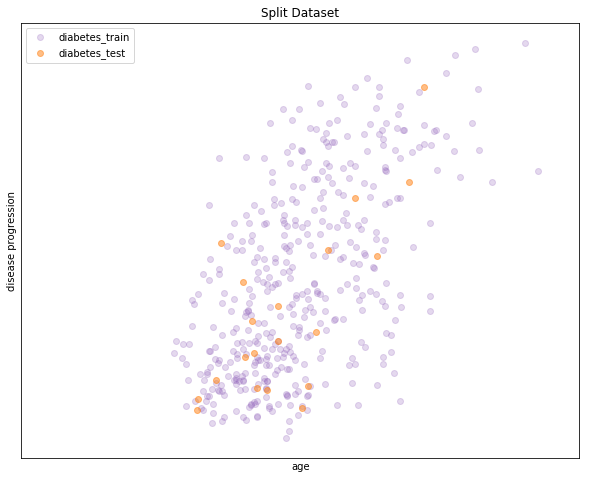

In [0]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

plt.figure(figsize=(10,8))
plt.title('Split Dataset')
plt.scatter(diabetes_X_train, diabetes_y_train, c='#9467bd', alpha = 0.25, label='diabetes_train')
plt.scatter(diabetes_X_test, diabetes_y_test, c='#ff7f0e', alpha = 0.5, label='diabetes_test')
plt.xlim((-0.2, 0.2))
plt.xticks(())
plt.yticks(())
plt.xlabel('age')
plt.ylabel('disease progression')
plt.legend()
plt.show()

## 2. Build and train the model against the training data

We create a variable to hold our model then use the `fit()` method to train the model using our training data.

This can get a lot more complex when validation, feature selection or model selection is included. The model might also include multiple parts chained together in a pipeline.

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3. Evaluate our trained model

We use the `predict()` method to provide predictions against our test features dataset. These predictions will be used in our results to demonstrate how well our trained model might work in the real world.

In [0]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

## 4. Output some results 

We show value of the parameter(s) that got trained. There's only one parameter in this case because we only used one feature.

We present two measures of accuracy here
- The error, which we want to minimize
- The proportion of variance explained by the model, which we want to maximize. 

Finally, we create a graph showing our training data points (light gray) and our test data points (black) overlayed with the regression line (blue) that our model learned.

Model coefficients: [938.23786125]
Mean squared error: 2548.07
Variance (R²) score: 0.4726 (= 47.26%)




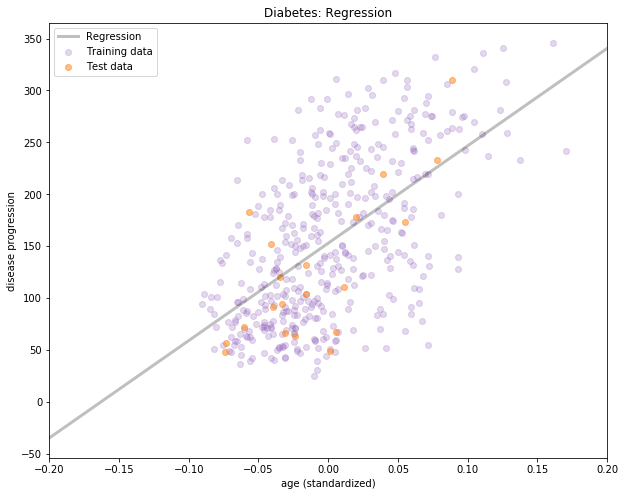

In [0]:
## Text results

# The coefficients (parameters) that were learned
print(f'Model coefficients: {regr.coef_}')
# The mean squared error
print(f"Mean squared error: {mean_squared_error(diabetes_y_test, diabetes_y_pred):.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance (R²) score: {r2_score(diabetes_y_test, diabetes_y_pred):.4f} (= {r2_score(diabetes_y_test, diabetes_y_pred)*100:.2f}%)\n\n')

## Graphical results

plt.figure(figsize=(10,8))

# Plot outputs for training and test data
plt.scatter(diabetes_X_train, diabetes_y_train, c='#9467bd', alpha = 0.25, label='Training data')
plt.scatter(diabetes_X_test, diabetes_y_test, c='#ff7f0e', alpha = 0.5, label='Test data')

# Plot regression line
x_limits = (-0.2, 0.2)
# x coordinates for the line will be at x_min and x_max
x_range = [[x] for x in x_limits]
# y coordinates are the predictions for x_min and x_max
y_pred_range = regr.predict(x_range)
plt.plot(x_range, y_pred_range, color='black', alpha = 0.25, linewidth=3, label='Regression')

# Set some attributes of the graph
plt.title('Diabetes: Regression')
plt.xlim(x_limits)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('age (standardized)')
plt.ylabel('disease progression')
plt.legend()

plt.show()

This example is fairly bare bones.
- There's no validation or model selection. 
- You will almost always also see *pandas* imported to manage data and *numpy* imported to perform linear algebra functions.